#### (e) Model Trees
#### In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has sigmaj βjXj > s as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. One can use scikit learn to call Weka to train Logistic Model Trees for classification. Train Logistic Model Trees for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [12]:
#2.e
#https://github.com/fracpete/python-weka-wrapper3/blob/master/doc/source/examples.rst
#https://github.com/shannontee/INF-552-Machine-Learning/blob/master/Homework4.ipynb?fbclid=IwAR25jEyRDowFL1WLTdkbhRrPvLEmoJy6MgT2kN5P3tMaahNiFZBnk63vkNE
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np
import weka.core.jvm as jvm
from weka.core.converters import Loader
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.classifiers import Random
from weka.plot.classifiers import plot_roc
csv_train= pd.read_csv('aps_failure_training_set.csv',skiprows=20,na_values='na') 
csv_test= pd.read_csv('aps_failure_test_set.csv',skiprows=20,na_values='na')  

In [15]:
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/pks19951017/opt/anaconda3/lib/python3.7/site-packages/javabridge-1.0.18-py3.7-macosx-10.9-x86_64.egg/javabridge/jars/rhino-1.7R4.jar', '/Users/pks19951017/opt/anaconda3/lib/python3.7/site-packages/javabridge-1.0.18-py3.7-macosx-10.9-x86_64.egg/javabridge/jars/runnablequeue.jar', '/Users/pks19951017/opt/anaconda3/lib/python3.7/site-packages/javabridge-1.0.18-py3.7-macosx-10.9-x86_64.egg/javabridge/jars/cpython.jar', '/Users/pks19951017/opt/anaconda3/lib/python3.7/site-packages/python_weka_wrapper3-0.1.7-py3.7.egg/weka/lib/python-weka-wrapper.jar', '/Users/pks19951017/opt/anaconda3/lib/python3.7/site-packages/python_weka_wrapper3-0.1.7-py3.7.egg/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [16]:
csv_train['class'] = csv_train['class'].replace(1, 'pos')
csv_train['class'] = csv_train['class'].replace(0, 'neg')
csv_test['class'] = csv_test['class'].replace(1, 'pos')
csv_test['class'] = csv_test['class'].replace(0, 'neg')

In [17]:
csv_train.to_csv('csv_train.csv', index=False)
loader = Loader(classname="weka.core.converters.CSVLoader")
train = loader.load_file("csv_train.csv")
train.class_is_first()

In [18]:
clf = Classifier(classname="weka.classifiers.trees.LMT")
evaluation = Evaluation(train)
evaluation.crossvalidate_model(clf, train, 5, Random(1))

In [19]:
csv_test.to_csv('csv_test.csv', index=False)
loader = Loader(classname="weka.core.converters.CSVLoader")
test = loader.load_file('csv_test.csv')
test.class_is_first()

In [21]:
clf2 = Classifier(classname="weka.classifiers.trees.LMT")
clf2.build_classifier(train)
e_test = Evaluation(train)
e_test.test_model(clf2,test)

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
print(evaluation.matrix())

=== Confusion Matrix ===

     a     b   <-- classified as
 58852   148 |     a = neg
   327   673 |     b = pos



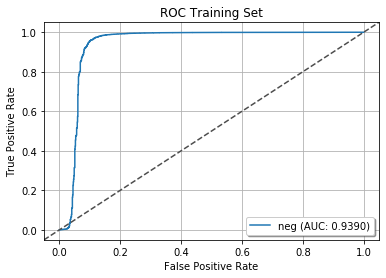

In [31]:
plot_roc(evaluation, title='ROC Training Set')

In [41]:
print(e_test.matrix())

=== Confusion Matrix ===

     a     b   <-- classified as
 15581    44 |     a = neg
   110   265 |     b = pos



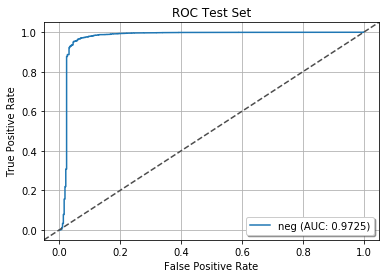

In [42]:
plot_roc(e_test, title='ROC Test Set')

#### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.

In [47]:
#2.f
#https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
from imblearn.over_sampling import SMOTE

train_df= pd.read_csv('aps_failure_training_set.csv',skiprows=20,na_values='na') 
test_df= pd.read_csv('aps_failure_test_set.csv',skiprows=20,na_values='na') 

#train_df = train_df.applymap(lambda x: np.nan if x == 'na' else x)
#train_df = train_df.apply(pd.to_numeric, errors='ignore')
train_df = train_df.fillna(value = train_df.mean(), axis=0)

#test_df = test_df.applymap(lambda x: np.nan if x == 'na' else x)
#test_df = test_df.apply(pd.to_numeric, errors='ignore')
test_df = test_df.fillna(value = test_df.mean(), axis=0)

train_df['class'] = train_df['class'].replace(1, 'pos')
train_df['class'] = train_df['class'].replace(0, 'neg')
test_df['class'] = test_df['class'].replace(1, 'pos')
test_df['class'] = test_df['class'].replace(0, 'neg')

#train_df['class'] = train_df['class'].apply(lambda x: 1 if x == 'pos' else 0)
#test_df['class'] = test_df['class'].apply(lambda x: 1 if x == 'pos' else 0)

x_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]
x_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]



sm = SMOTE(random_state=42)
x_tr_res, y_tr_res = sm.fit_resample(x_train, y_train.ravel())

sm2 = SMOTE(random_state=42)
x_te_res, y_te_res = sm2.fit_resample(x_test, y_test.ravel())


In [48]:
tr_res_df = pd.DataFrame(x_tr_res)
y_tr_res = pd.DataFrame(y_tr_res, columns=['class'])
tr_res_df['class'] = y_tr_res['class']

te_res_df = pd.DataFrame(x_te_res)
y_te_res = pd.DataFrame(y_te_res, columns=['class'])
te_res_df['class'] = y_te_res['class']

In [49]:
tr_res_df.to_csv('tr_res_df.csv', index=False)
loader = Loader(classname="weka.core.converters.CSVLoader")
tr_res = loader.load_file("tr_res_df.csv")
tr_res.class_is_last()

In [50]:
clf = Classifier(classname="weka.classifiers.trees.LMT")
evaluation_sm= Evaluation(tr_res)
evaluation_sm.crossvalidate_model(clf, tr_res, 5, Random(1))

In [51]:
te_res_df.to_csv('te_res_df.csv', index=False)
loader = Loader(classname="weka.core.converters.CSVLoader")
te_res = loader.load_file("te_res_df.csv")
te_res.class_is_last()

In [53]:
clf2 = Classifier(classname="weka.classifiers.trees.LMT")
clf2.build_classifier(tr_res)


array([0., 0., 0., ..., 1., 1., 1.])

In [58]:
evaluation_sm2 = Evaluation(tr_res)

In [59]:
evaluation_sm2.test_model(clf2,te_res)

array([0., 0., 0., ..., 1., 1., 1.])

In [60]:
#confusion maxtrix  roc plot 
print(evaluation_sm.matrix())

=== Confusion Matrix ===

     a     b   <-- classified as
 57960  1040 |     a = neg
   905 58095 |     b = pos



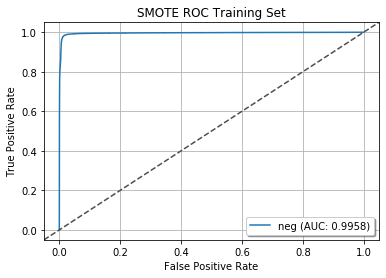

In [61]:
plot_roc(evaluation_sm, title='SMOTE ROC Training Set')

In [56]:
print(evaluation_sm2.matrix())

=== Confusion Matrix ===

     a     b   <-- classified as
 15026   599 |     a = neg
  1095 14530 |     b = pos



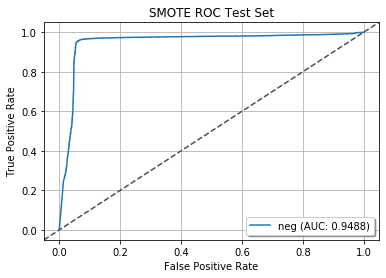

In [57]:
plot_roc(evaluation_sm2, title='SMOTE ROC Test Set')

In [62]:
print(clf2)

Logistic model tree 
------------------

96 <= 1475223.36
|   7 <= 979.274734
|   |   108 <= 7834.821927
|   |   |   32 <= 53729.744367
|   |   |   |   103 <= 4674802.952953
|   |   |   |   |   117 <= 1078218
|   |   |   |   |   |   134 <= 2728.305686
|   |   |   |   |   |   |   29 <= 3.102789
|   |   |   |   |   |   |   |   8 <= 43510
|   |   |   |   |   |   |   |   |   44 <= 23036
|   |   |   |   |   |   |   |   |   |   41 <= 3214.925218
|   |   |   |   |   |   |   |   |   |   |   142 <= 68413.286128
|   |   |   |   |   |   |   |   |   |   |   |   17 <= 0.413204: LM_1:198/2772 (48608)
|   |   |   |   |   |   |   |   |   |   |   |   17 > 0.413204: LM_2:198/2772 (3334)
|   |   |   |   |   |   |   |   |   |   |   142 > 68413.286128
|   |   |   |   |   |   |   |   |   |   |   |   18 <= 1457.604201: LM_3:198/2772 (565)
|   |   |   |   |   |   |   |   |   |   |   |   18 > 1457.604201: LM_4:198/2772 (51)
|   |   |   |   |   |   |   |   |   |   41 > 3214.925218: LM_5:198/2376 (88)
|   |   | 